# NON-LINEAR REGRESSION WITH SCIPY OPTIMIZE

Introduction

First, plot the input feature (x) and y (target) with scatter plot. 

Then, based on the on the trend of the dataset, we will model

    a) Polynomial function

    b) Logarithmic function

    c) Exponential function

    d) Power function

Here are the steps

    a) Define the function

    b) Apply curve_fit(function, x, y) function from Scipy.optimizer library to compute the optimized coefficients

    c) unpack the coefficients

    d) Model prediction using input the x: y_model_predict = func(x, coefficient 1, coefficient 2..)

    e) plot scatter data (x, y) and plot-line of model(x, y_model_predict)
    
    f) Model Performance accuracy analysis by computing Regression Coefficient, R2



# Example 1: Gnerate Syntheric data from known function and apply also a certain Random Noise

    Let use define an exponential function
    
        y = 0.1*exp(0.3x) +alfa*np.random.random(len(x)
    
    let us do two examples with two cases
        
        Case 1: alfa = 0 # without noise
   
        Case 2: alfa = 0.888  # with noise
    
    

# Project work

    Using the above example, import your project file.
    Define x = input feature (i.e. NEU, or DEN, or Vs)
           y = target variable (i.e Vp)
           
     First plot, x,y and based on the trend line, estimate the aproximate mapping function
     
     Then define the function and find the coefficient with Scipy.optimize curve fitting algorithoms
     
     Last step, compute the R2. Based on the R2 values, pass the function that best fit the dataset.
     
     Compute Co with the true, Vp and using the best model that estimate Vp from Eg Porosity, Vp= 5.308*exp(-1.579*NEU)
            C_True = 0.77*y**2.92
            C_model = 0.77*(5.308*np.exp(-1.579*NEU))**2.92
            plt.plot(C_True)
            plt.plot(C_model)

     

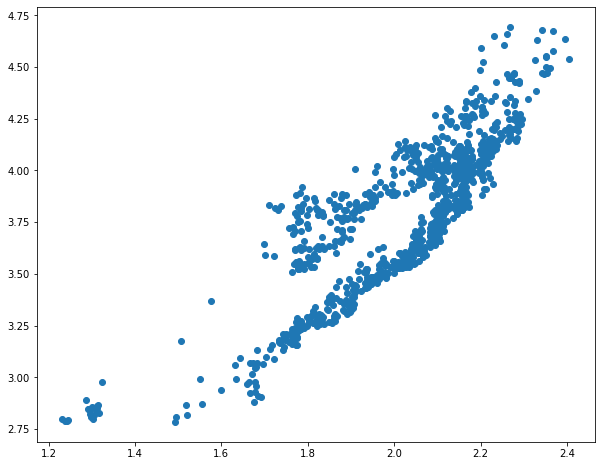

In [25]:
#=============================================================================================
# Step 1: Import libraries
import pandas as pd  # To read data  
import numpy as np    # To perform computate eg. exponential, log, as well as to generate ransom noise 
from scipy.optimize import curve_fit  # to perform non-linear curve fitting (i.e to compute an optimized coefficients)
import matplotlib.pyplot as plt  # To displayd ata for visualization
from sklearn.metrics import r2_score # To perform model accuracy performance analysis
#=============================================================================================



#=============================================================================================
# Step 2: let's generate x and y, and add some noise into y
# Here, you can generate other functions, polynomial, logarithmic, power as well.


# Task 1: Class work: Generate synthetic data from an exponential function with and without noise

# x = np.linspace(0, 10, 101)
# alfa = 0 # NOise (starter med 0 noise, og øker etterpå). Vi ser med 0 at den er eksponential
# # Det at vi ser den er eksponentiell er alt vi trenger fra denne ruten
# # Går så til neste celle
# # Men obs, legg merke til at vi har 2 koeffisienter her 0.1 og 0.3 (husk det til neste celle)
# y = 0.1*np.exp(0.3*x) + alfa*np.random.random(len(x))


# Task 2a: Project work: Import Project file dataframe (bruk clean data nå)
df = pd.read_excel('CleanOutlier1.xlsx')

# Task 2b: Define input (x) and target (y) here
x= df[['Vs']]  # Here use double parenthesis
# X= df[['Vs','DEN','NEU']]  # Here use double parenthesis
# X= df[['Vs','DEN','NEU']]  # Here use double parenthesis
y = df['Vp']
# x = df['input here']  
# y = df['target here']

#=============================================================================================

# plot data and estimate the possible/expected maping function for the next step
plt.figure(figsize = (10,8))
# plt.plot(X, y, 'b*')
plt.scatter(x, y)
#=============================================================================================


# Modeling and Model perfomance analysis

In [26]:
#=============================================================================================
# let's define the function form. This is due the the behaivor of the dataset spread
# Dette er den generelle formelen for eksponentiell funksjon
# Definerer funksjonen slik siden vi fant ut at denne passet best i forrige celle
# Kjører vi denne cellen, ser vi at vi får koeffisientene 0.1 og 0.3, akkurat som i øvre celle
# Nå skal vi tilbake til første celle og gjøre det samme med vår clean data
def func(x, a, b):
    return a*np.exp(b*x)
      
#=============================================================================================
# Here we optimize the parameters values, a and b. 

popt, _ = curve_fit(func, x, y) 

#=============================================================================================


#=============================================================================================

# Here we print the optimized parameters values, a and b. 

a,b = popt

print(f'a={a}, b={b}')

#print(popt)
#=============================================================================================



#=============================================================================================
# Visualization of the dataset and the curve fit model prediction for a x input data

plt.figure(figsize = (10,8))
plt.scatter(x, y)
#=============================================================================================



#=============================================================================================
#Print equation of the Powerlaw Equation
print('y = %.3f*exp(%.3fx)' % (a, b))
#=============================================================================================


#=============================================================================================
# create a line plot for the mapping function

y_model_predict = func(x, a, b)

plt.plot(x, y_model_predict, '--', color='red')

plt.xlabel('Neutron Porosity (NEU), %')
plt.ylabel('Compressional Wave Velocity (Vp), km/s')
plt.title('Power Law')
plt.show()
#=============================================================================================

#=============================================================================================
# Model accuracy perforamnce analysis withr r2 
#=============================================================================================

print('Regression Coefficient:',r2_score(y, y_model_predict))


ValueError: Unable to coerce to Series, length must be 1: given 1059

# Compute Co with the true (Vp) and Vp that is estimated from model with other inputs 

In [37]:
# Compute Co with the true (Vp) and the model that estimate example from NEU (vp = 5.308*exp(-1.579NEU))

#C_True = 0.77*y**2.92
#C_model = 
#============================================

#============================================
#Plot 
#plt.plot(C_True)
#plt.plot(C_model)
#============================================


#============================================
# R2 value is the same as the one obtained from the Vp. You can test as the following
#print('Regression Coefficient:',r2_score(C_True, C_model))
#============================================

# What do you observe? 

In the absence of Vp true, we used Porosity to determine, Vp. 
The comparions of Co with the true and from model predicted shows quite good agrement eventhong the R2 was 76%.

